# **Air Quality Index (AQI) Prediction Using Machine Learning**

## LOAD LIBRARIES



In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV

## LOAD DATA

In [130]:
df_station=pd.read_csv('/content/stations.csv')
df_city_day=pd.read_csv('/content/city_day.csv')
df_city_hour=pd.read_csv('/content/city_hour.csv')
df_station_day=pd.read_csv('/content/station_day.csv')
df_station_hour=pd.read_csv('/content/station_hour.csv')

/tmp/ipython-input-589048626.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_station_hour=pd.read_csv('/content/station_hour.csv')


In [59]:
print(df_station.head())


  StationId                                     StationName  \
0     AP001                  Secretariat, Amaravati - APPCB   
1     AP002  Anand Kala Kshetram, Rajamahendravaram - APPCB   
2     AP003                      Tirumala, Tirupati - APPCB   
3     AP004                 PWD Grounds, Vijayawada - APPCB   
4     AP005          GVM Corporation, Visakhapatnam - APPCB   

                City           State  Status  
0          Amaravati  Andhra Pradesh  Active  
1  Rajamahendravaram  Andhra Pradesh     NaN  
2           Tirupati  Andhra Pradesh     NaN  
3         Vijayawada  Andhra Pradesh     NaN  
4      Visakhapatnam  Andhra Pradesh  Active  


In [60]:
print(df_city_day.head())


        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  


In [61]:
print(df_city_hour.head())


        City             Datetime  PM2.5  PM10    NO    NO2    NOx  NH3    CO  \
0  Ahmedabad  2015-01-01 01:00:00    NaN   NaN  1.00  40.01  36.37  NaN  1.00   
1  Ahmedabad  2015-01-01 02:00:00    NaN   NaN  0.02  27.75  19.73  NaN  0.02   
2  Ahmedabad  2015-01-01 03:00:00    NaN   NaN  0.08  19.32  11.08  NaN  0.08   
3  Ahmedabad  2015-01-01 04:00:00    NaN   NaN  0.30  16.45   9.20  NaN  0.30   
4  Ahmedabad  2015-01-01 05:00:00    NaN   NaN  0.12  14.90   7.85  NaN  0.12   

      SO2      O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  122.07     NaN      0.0      0.0     0.0  NaN        NaN  
1   85.90     NaN      0.0      0.0     0.0  NaN        NaN  
2   52.83     NaN      0.0      0.0     0.0  NaN        NaN  
3   39.53  153.58      0.0      0.0     0.0  NaN        NaN  
4   32.63     NaN      0.0      0.0     0.0  NaN        NaN  


In [62]:
print(df_station_day.head())


  StationId        Date  PM2.5    PM10    NO    NO2    NOx    NH3    CO  \
0     AP001  2017-11-24  71.36  115.75  1.75  20.65  12.40  12.19  0.10   
1     AP001  2017-11-25  81.40  124.50  1.44  20.50  12.08  10.72  0.12   
2     AP001  2017-11-26  78.32  129.06  1.26  26.00  14.85  10.28  0.14   
3     AP001  2017-11-27  88.76  135.32  6.60  30.85  21.77  12.91  0.11   
4     AP001  2017-11-28  64.18  104.09  2.56  28.07  17.01  11.42  0.09   

     SO2      O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
0  10.76  109.26     0.17     5.92    0.10    NaN        NaN  
1  15.24  127.09     0.20     6.50    0.06  184.0   Moderate  
2  26.96  117.44     0.22     7.95    0.08  197.0   Moderate  
3  33.59  111.81     0.29     7.63    0.12  198.0   Moderate  
4  19.00  138.18     0.17     5.02    0.07  188.0   Moderate  


In [63]:
print(df_station_hour.head())

  StationId             Datetime  PM2.5    PM10    NO    NO2    NOx    NH3  \
0     AP001  2017-11-24 17:00:00  60.50   98.00  2.35  30.80  18.25   8.50   
1     AP001  2017-11-24 18:00:00  65.50  111.25  2.70  24.20  15.07   9.77   
2     AP001  2017-11-24 19:00:00  80.00  132.00  2.10  25.18  15.15  12.02   
3     AP001  2017-11-24 20:00:00  81.50  133.25  1.95  16.25  10.23  11.58   
4     AP001  2017-11-24 21:00:00  75.25  116.00  1.43  17.48  10.43  12.03   

    CO    SO2      O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  0.1  11.85  126.40      0.1     6.10    0.10  NaN        NaN  
1  0.1  13.17  117.12      0.1     6.25    0.15  NaN        NaN  
2  0.1  12.08   98.98      0.2     5.98    0.18  NaN        NaN  
3  0.1  10.47  112.20      0.2     6.72    0.10  NaN        NaN  
4  0.1   9.12  106.35      0.2     5.75    0.08  NaN        NaN  


In [135]:
df_train=pd.read_csv('/content/city_day.csv')
print('Train Dataset:')
display(df_train.head())

Train Dataset:


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [65]:
df_train.shape

(29531, 16)

In [66]:
df_train.dtypes

,0
City,object
Date,object
PM2.5,float64
PM10,float64
NO,float64
NO2,float64
NOx,float64
NH3,float64
CO,float64
SO2,float64


In [67]:
df = df_train.copy()

In [68]:
df=df.drop(['AQI_Bucket', 'City', 'Date'], axis=1)

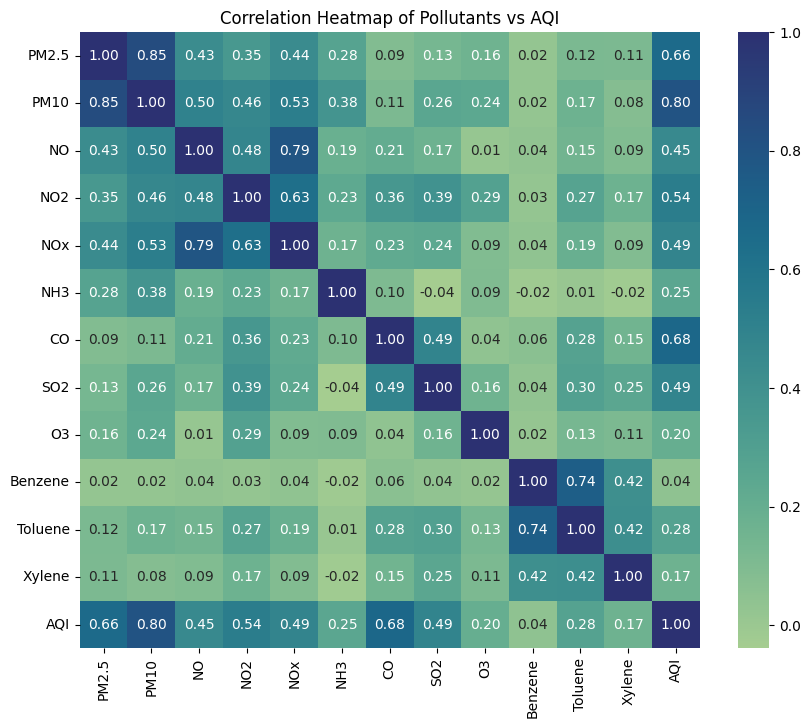

In [69]:
# ---- 1. Correlation Heatmap ----
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="crest", fmt=".2f")
plt.title("Correlation Heatmap of Pollutants vs AQI")
plt.show()

In [120]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Fill missing AQI values with mean
mean_aqi = int(df['AQI'].mean())
df['AQI'] = df['AQI'].fillna(mean_aqi)

# Define features (remove non-numeric columns)
X = df.drop(['AQI'], axis=1)
y = df['AQI']

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Feature importance
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nRandom Forest Feature Importance:\n", importances)



Random Forest Feature Importance:
     Feature  Importance
0     PM2.5    0.493405
6        CO    0.344007
1      PM10    0.037908
2        NO    0.034360
8        O3    0.018126
4       NOx    0.015657
7       SO2    0.014849
3       NO2    0.012344
10  Toluene    0.009082
11   Xylene    0.008178
9   Benzene    0.007346
5       NH3    0.004738


In [145]:
df1 = df_train.copy()
from sklearn.linear_model import LassoCV
import pandas as pd

# Example: Assuming your dataframe is df and target column is 'AQI'
X = df1.drop(columns=['AQI'])   # Features
y = df1['AQI']                  # Target

# 3. LassoCV (automatic feature selection)
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X, y)

lasso_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\nLasso Feature Coefficients:\n", lasso_importance)



Lasso Feature Coefficients:
   Feature  Coefficient
4      CO    10.127243
0   PM2.5     0.980376
5     SO2     0.640346
3     NO2     0.455031
1    PM10     0.280057
6      O3     0.176286
2      NO     0.035912


In [ ]:
df_train.describe()

In [71]:
df_train.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


## DATA CLEANING

In [136]:
mean=df_train['PM2.5'].mean()
mean=int(mean)
df_train['PM2.5']=df_train['PM2.5'].fillna(mean)

In [137]:
mean=df_train['PM10'].mean()
mean=int(mean)
df_train['PM10']=df_train['PM10'].fillna(mean)

In [138]:
mean=df_train['NO'].mean()
mean=int(mean)
df_train['NO']=df_train['NO'].fillna(mean)

In [139]:
mean=df_train['NO2'].mean()
mean=int(mean)
df_train['NO2']=df_train['NO2'].fillna(mean)

In [140]:
mean=df_train['CO'].mean()
mean=int(mean)
df_train['CO']=df_train['CO'].fillna(mean)

In [141]:
mean=df_train['SO2'].mean()
mean=int(mean)
df_train['SO2']=df_train['SO2'].fillna(mean)

In [142]:
mean=df_train['O3'].mean()
mean=int(mean)
df_train['O3']=df_train['O3'].fillna(mean)

In [143]:
mean=df_train['AQI'].mean()
mean=int(mean)
df_train['AQI']=df_train['AQI'].fillna(mean)

In [80]:
df_train.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,4185
NH3,10328
CO,0
SO2,0


The AQI calculation uses 7 measures: PM2.5, PM10, SO2, NO, NO2, CO and O3.



In [144]:
df_train=df_train.drop(['City','Date','NOx','NH3','Benzene','Toluene','Xylene','AQI_Bucket'],axis=1)
df_train.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'CO', 'SO2', 'O3', 'AQI'], dtype='object')

In [82]:
df_train.head(10)

,PM2.5,PM10,NO,NO2,CO,SO2,O3,AQI
0,67.0,118.0,0.92,18.22,0.92,27.64,133.36,166.0
1,67.0,118.0,0.97,15.69,0.97,24.55,34.06,166.0
2,67.0,118.0,17.40,19.30,17.40,29.07,30.70,166.0
3,67.0,118.0,1.70,18.48,1.70,18.59,36.08,166.0
4,67.0,118.0,22.10,21.42,22.10,39.33,39.31,166.0
5,67.0,118.0,45.41,38.48,45.41,45.76,46.51,166.0
6,67.0,118.0,112.16,40.62,112.16,32.28,33.47,166.0
7,67.0,118.0,80.87,36.74,80.87,38.54,31.89,166.0
8,67.0,118.0,29.16,31.00,29.16,58.68,25.75,166.0
9,67.0,118.0,17.00,7.04,2.00,8.29,4.55,166.0


In [83]:
preparedata=df_train.astype(int)
preparedata.head()

,PM2.5,PM10,NO,NO2,CO,SO2,O3,AQI
0,67,118,0,18,0,27,133,166
1,67,118,0,15,0,24,34,166
2,67,118,17,19,17,29,30,166
3,67,118,1,18,1,18,36,166
4,67,118,22,21,22,39,39,166


In [84]:
preparedata.describe()

,PM2.5,PM10,NO,NO2,CO,SO2,O3,AQI
count,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,66.961667,117.771460,17.061698,28.059226,1.805052,14.029765,33.995259,166.390099
std,59.415477,71.502782,21.365891,22.944183,6.710749,16.910682,20.161619,129.064459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,32.000000,79.000000,6.000000,12.000000,0.000000,6.000000,20.000000,88.000000
50%,58.000000,118.000000,11.000000,25.000000,0.000000,10.000000,34.000000,138.000000
75%,72.000000,118.000000,17.000000,34.000000,1.000000,14.000000,42.000000,179.000000
max,949.000000,1000.000000,390.000000,362.000000,175.000000,193.000000,257.000000,2049.000000


## DATA VISUALIZATION

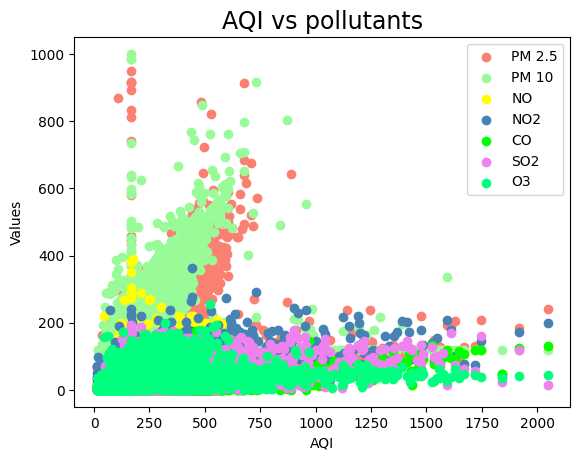

In [85]:
x=preparedata['AQI']
y1=preparedata['PM2.5']
y2=preparedata['PM10']
y3=preparedata['NO']
y4=preparedata['NO2']
y5=preparedata['CO']
y6=preparedata['SO2']
y7=preparedata['O3']
plt.scatter(x,y1,label='PM 2.5',color='salmon')
plt.scatter(x,y2,label='PM 10',color='palegreen')
plt.scatter(x,y3,label='NO',color='yellow')
plt.scatter(x,y4,label='NO2',color='steelblue')
plt.scatter(x,y5,label='CO',color='lime')
plt.scatter(x,y6,label='SO2',color='violet')
plt.scatter(x,y7,label='O3',color='springgreen')
plt.legend()
plt.title('AQI vs pollutants',fontsize=17)
plt.xlabel('AQI')
plt.ylabel('Values')
plt.show()

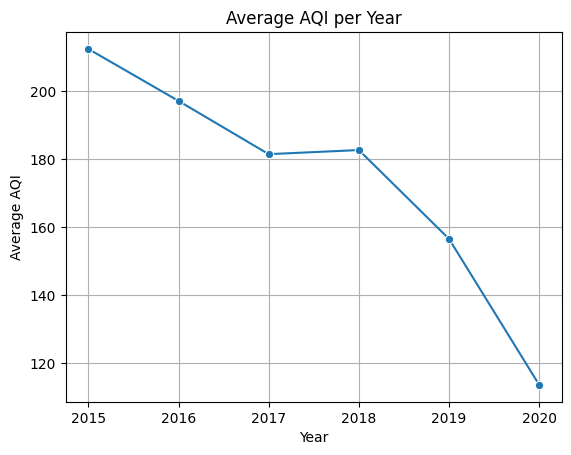

In [86]:
df_train=pd.read_csv('/content/city_day.csv')
df_train['Date']=pd.to_datetime(df_train['Date'],errors='coerce')
df_train['Year']=df_train['Date'].dt.year
avg_aqi_per_year=df_train.groupby('Year')['AQI'].mean().reset_index()
sns.lineplot(data=avg_aqi_per_year,x='Year',y='AQI',marker='o')
plt.title('Average AQI per Year')
plt.xlabel('Year')
plt.ylabel('Average AQI')
plt.grid(True)
plt.show()


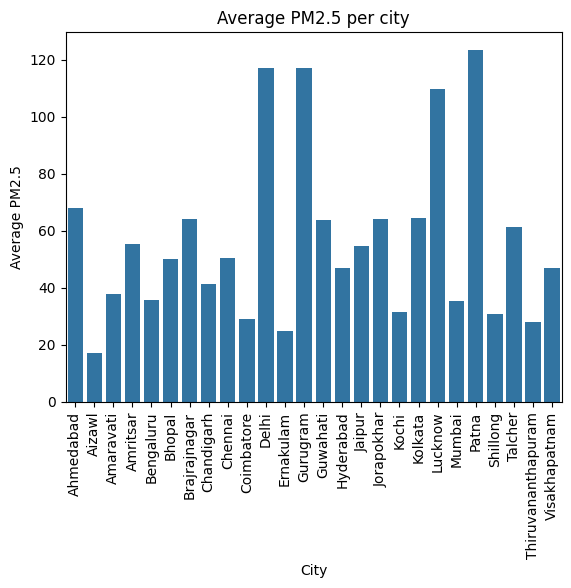

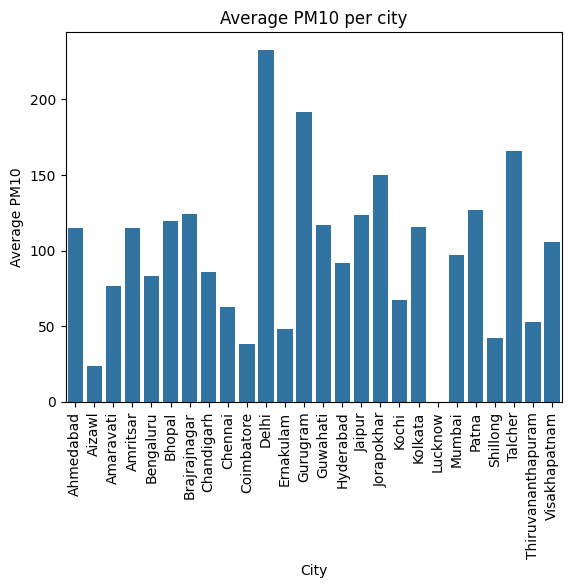

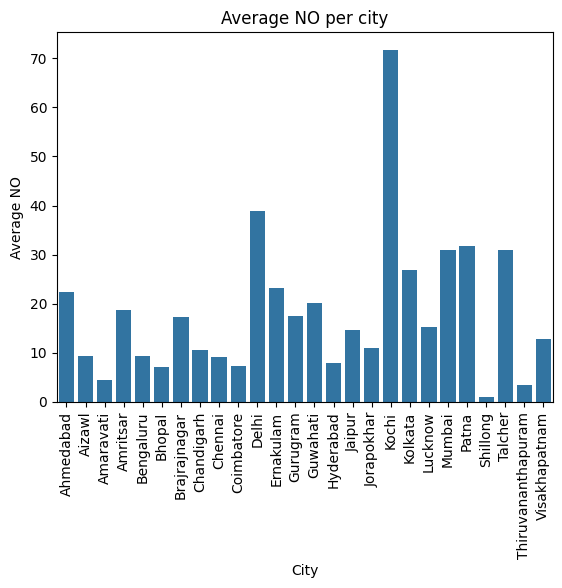

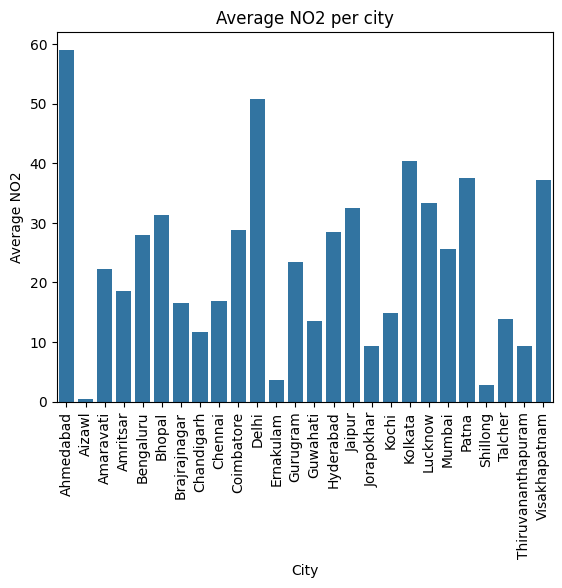

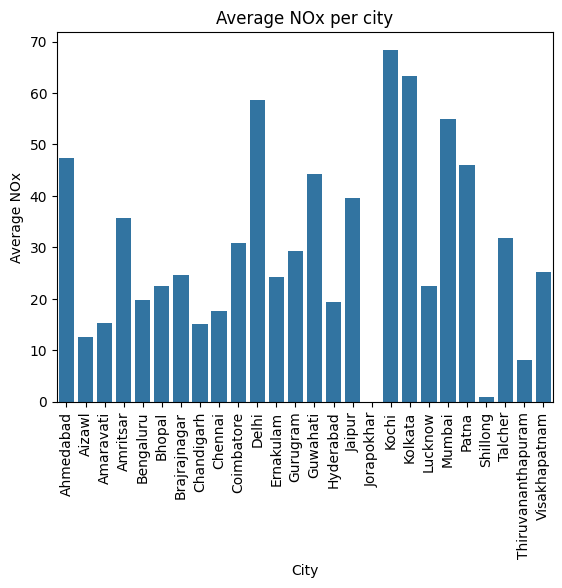

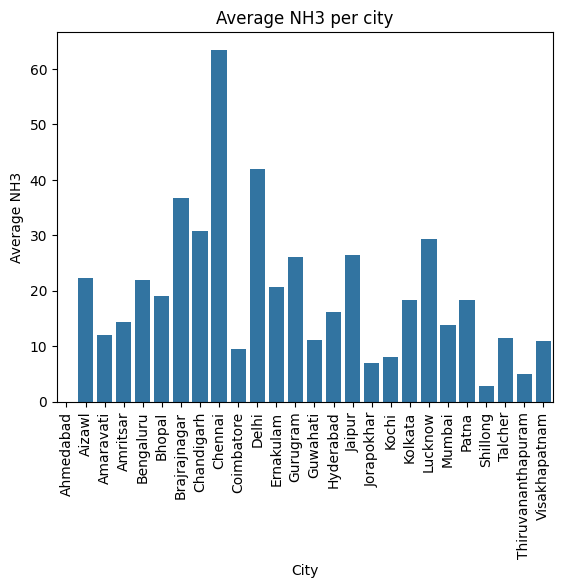

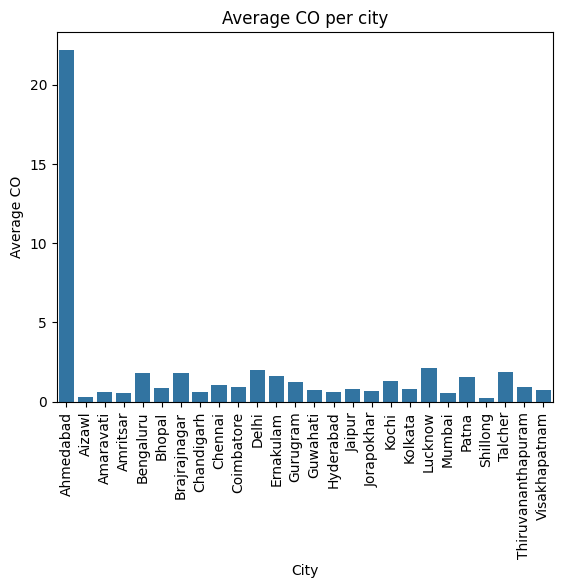

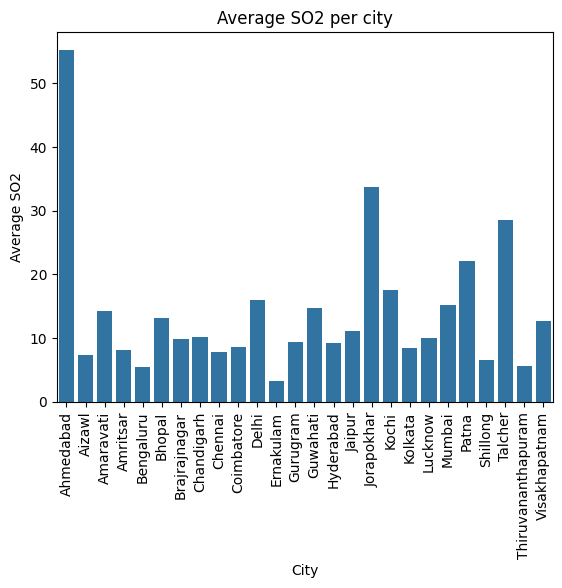

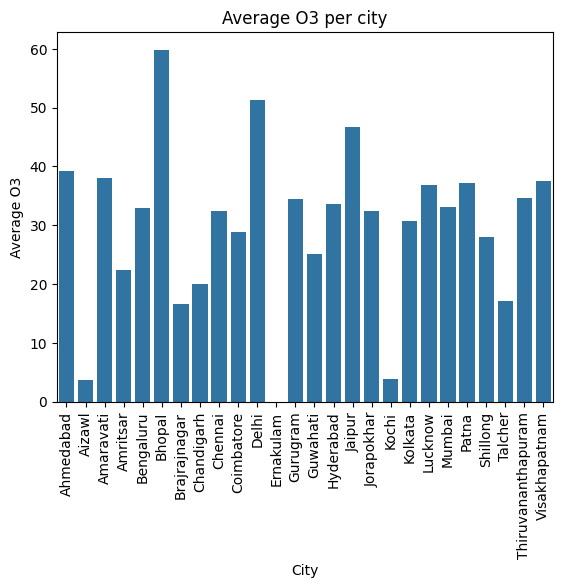

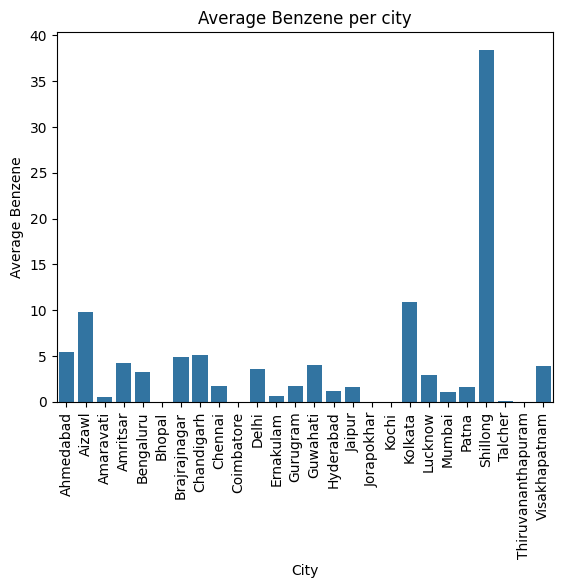

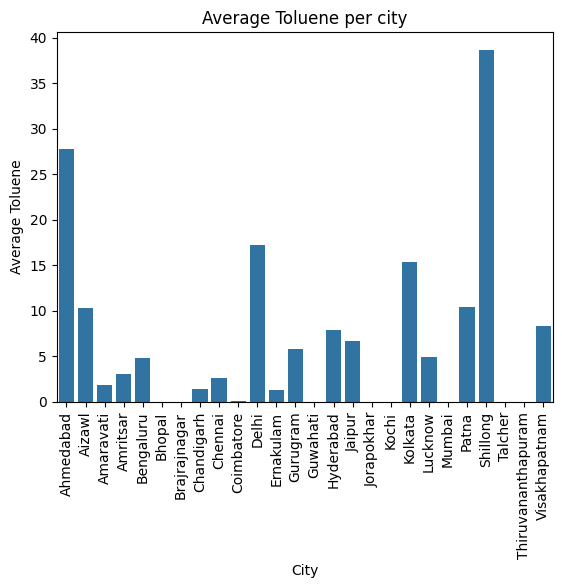

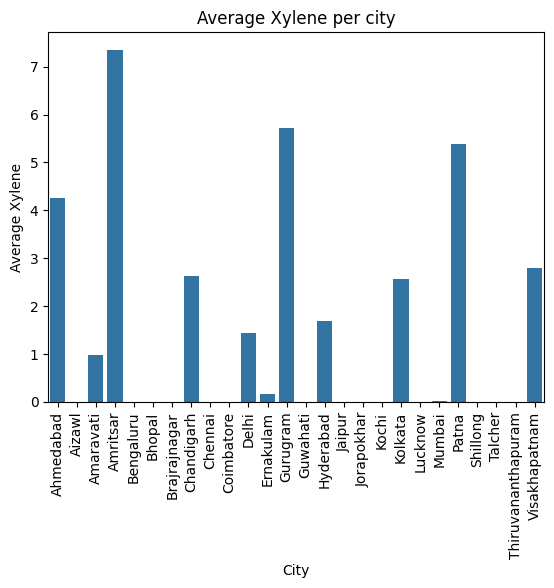

In [87]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
avg_pollutants_per_city=df_train.groupby('City')[pollutants].mean().reset_index()
for pollutant in pollutants:
  sns.barplot(data=avg_pollutants_per_city,x='City',y=pollutant)
  plt.title(f'Average {pollutant} per city')
  plt.xlabel('City')
  plt.ylabel(f'Average {pollutant}')
  plt.xticks(rotation=90)
  plt.show()

<Axes: >

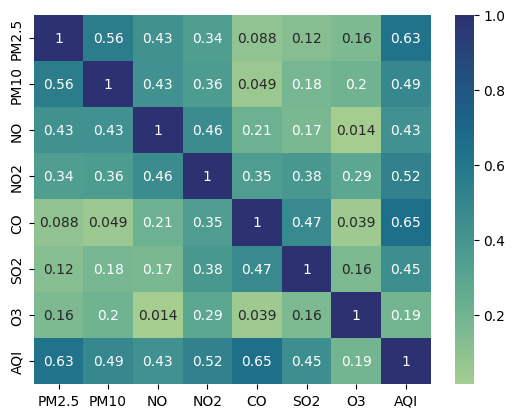

In [88]:
corr=preparedata.corr()
sns.heatmap(corr,annot=True,cmap='crest')

## DATA TRAINING

In [89]:
from sklearn.model_selection import train_test_split
x=preparedata.drop(['AQI'],axis=1)
y=preparedata['AQI']


In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

## MODEL CREATION

 Linear Regression Model


In [91]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [92]:
lr.fit(x_train,y_train)

LinearRegression()

In [93]:
pred1=lr.predict(x_test)

In [94]:
print("Accuracy of the Linear Regression model comes to be: \n")
print(lr.score(x_train,y_train))

Accuracy of the Linear Regression model comes to be: 

0.7810934579232732


Lasso Regression

In [95]:
from sklearn.linear_model import Lasso
ls=Lasso()

In [96]:
ls.fit(x_train,y_train)

Lasso()

In [97]:
pred2=ls.predict(x_test)

In [98]:
print("Accuracy of the Lasso Regression model comes to be: \n")
print(ls.score(x_train,y_train))

Accuracy of the Lasso Regression model comes to be: 

0.7810919040933092


Ridge Regression

In [99]:
from sklearn.linear_model import Ridge
re=Ridge()

In [100]:
re.fit(x_train,y_train)

Ridge()

In [101]:
pred3=re.predict(x_test)

In [102]:
print("Accuracy of the Ridge Regression model comes to be: \n")
print(re.score(x_train,y_train))

Accuracy of the Ridge Regression model comes to be: 

0.7810934579229561


Decision Tree Regressor

In [103]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [104]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [105]:
pred4=dt.predict(x_test)

In [106]:
print("Accuracy of the Decision Tree Regressor model comes to be: \n")
print(dt.score(x_train,y_train))

Accuracy of the Decision Tree Regressor model comes to be: 

0.9990504156837606


Random Forest Regressor

In [107]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=200,random_state=42)
rf.fit(x_train,y_train)
pred5=rf.predict(x_test)

In [108]:
print("Accuracy of RandomForestRegressor model comes to be: \n")
print(rf.score(x_train,y_train))

Accuracy of RandomForestRegressor model comes to be: 

0.9812086374129338


Gradient Boosting Regressor

In [109]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor(n_estimators=200,random_state=42)
gb.fit(x_train,y_train)
pred6=gb.predict(x_test)

In [110]:
print("Accuracy of GradientBoostingRegressor model comes to be: \n")
print(gb.score(x_train,y_train))

Accuracy of GradientBoostingRegressor model comes to be: 

0.9059265065683072


Support Vector Regressor (SVR)

In [111]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf',C=10,gamma='scale')
svr.fit(x_train,y_train)
pred7=svr.predict(x_test)

In [112]:
print("Accuracy of SVR model comes to be: \n")
print(svr.score(x_train,y_train))

Accuracy of SVR model comes to be: 

0.800597079340971


k-Nearest Neighbors (KNN) Regressor

In [113]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
pred8=knn.predict(x_test)

In [114]:
print("Accuracy of KNN model comes to be: \n")
print(knn.score(x_train,y_train))

Accuracy of KNN model comes to be: 

0.8909508823517369


ElasticNet Regression

In [115]:
from sklearn.linear_model import ElasticNet
en=ElasticNet(alpha=1.0,l1_ratio=0.5,random_state=42,max_iter=10000)
en.fit(x_train,y_train)
pred9=en.predict(x_test)

In [116]:
print("Accuracy of ElasticNet model comes to be: \n")
print(en.score(x_train,y_train))

Accuracy of ElasticNet model comes to be: 

0.7810432925339139


Neural Network (MLP Regressor)

In [117]:
from sklearn.neural_network import MLPRegressor
mlp=MLPRegressor(hidden_layer_sizes=(100,50),max_iter=500,random_state=42)
mlp.fit(x_train,y_train)
pred10=mlp.predict(x_test)

In [118]:
print("Accuracy of MLP model comes to be: \n")
print(mlp.score(x_train,y_train))

Accuracy of MLP model comes to be: 

0.878336597370966


## PERFORMANCE EVALUATION

In [119]:
print("Model \t\t\t  RootMeanSquareError \t\t Accuracy of the model")
print("Linear Regression \t\t {:.4f} \t\t {:.4f}".format(root_mean_squared_error(y_test, pred1), lr.score(x_train,y_train)))
print("Lasso Regression \t\t {:.4f} \t\t {:.4f}".format(root_mean_squared_error(y_test, pred2), ls.score(x_train,y_train)))
print("Ridge Regression \t\t {:.4f} \t\t {:.4f}".format(root_mean_squared_error(y_test, pred3), re.score(x_train,y_train)))
print("Decision Tree Regressor\t\t {:.4f} \t\t {:.4f}".format(root_mean_squared_error(y_test, pred4), dt.score(x_train,y_train)))
print("Random Forest Regressor \t {:.4f} \t\t {:.4f}".format(root_mean_squared_error(y_test, pred5), rf.score(x_train, y_train)))
print("Gradient Boosting Regressor \t {:.4f} \t\t {:.4f}".format( root_mean_squared_error(y_test, pred6), gb.score(x_train, y_train)))
print("SVR \t\t\t\t {:.4f} \t\t {:.4f}".format(root_mean_squared_error(y_test, pred7), svr.score(x_train, y_train)))
print("KNN Regressor \t\t\t {:.4f} \t\t {:.4f}".format( root_mean_squared_error(y_test, pred8), knn.score(x_train, y_train)))
print("ElasticNet Regression \t\t {:.4f} \t\t {:.4f}".format(root_mean_squared_error(y_test, pred9), en.score(x_train, y_train)))
print("MLP Regressor \t\t\t {:.4f} \t\t {:.4f}".format(root_mean_squared_error(y_test, pred10), mlp.score(x_train, y_train)))



Model 			  RootMeanSquareError 		 Accuracy of the model
Linear Regression 		 53.2898 		 0.7811
Lasso Regression 		 53.3222 		 0.7811
Ridge Regression 		 53.2898 		 0.7811
Decision Tree Regressor		 63.4069 		 0.9991
Random Forest Regressor 	 46.2676 		 0.9812
Gradient Boosting Regressor 	 48.7054 		 0.9059
SVR 				 61.6146 		 0.8006
KNN Regressor 			 51.9515 		 0.8910
ElasticNet Regression 		 53.4752 		 0.7810
MLP Regressor 			 51.8873 		 0.8783
